In [127]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# Generate 50 data points 
N = 50

# random data on the x-axis in (-5, +5) 
X = np.random.random(N)*10 - 5

# a line plus some noise 
Y = 0.5 * X - 1 + np.random.randn(N) 

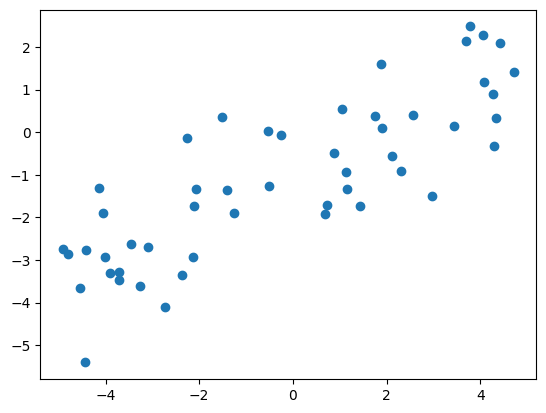

In [129]:
# Plot the data 
plt.scatter(X, Y);

In [130]:
# Create the linear regression model 
model = nn.Linear(1, 1)

In [131]:
# Loss and optimizer 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [132]:
# In ML we want our data to be of shpae: 
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [133]:
# PyTorch uses float32 by default
# Numpyt creates float64 by default 
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [134]:
type(inputs)

torch.Tensor

In [135]:
# Train the model 
n_epochs = 20 # need to try out different numbers and choose the best 
losses = []
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass 
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # keep the loss so we can plot it later 
    losses.append(loss.item()) # Tensor is a single number -> Python land : use .item()

    # backwawrd and optimize
    loss.backward() # calculate the gradient
    optimizer.step() # single step of gradient descent

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/20, Loss: 2.5308
Epoch 2/20, Loss: 2.3346
Epoch 3/20, Loss: 2.1652
Epoch 4/20, Loss: 2.0190
Epoch 5/20, Loss: 1.8926
Epoch 6/20, Loss: 1.7835
Epoch 7/20, Loss: 1.6892
Epoch 8/20, Loss: 1.6077
Epoch 9/20, Loss: 1.5373
Epoch 10/20, Loss: 1.4765
Epoch 11/20, Loss: 1.4239
Epoch 12/20, Loss: 1.3785
Epoch 13/20, Loss: 1.3392
Epoch 14/20, Loss: 1.3053
Epoch 15/20, Loss: 1.2760
Epoch 16/20, Loss: 1.2506
Epoch 17/20, Loss: 1.2287
Epoch 18/20, Loss: 1.2098
Epoch 19/20, Loss: 1.1934
Epoch 20/20, Loss: 1.1793


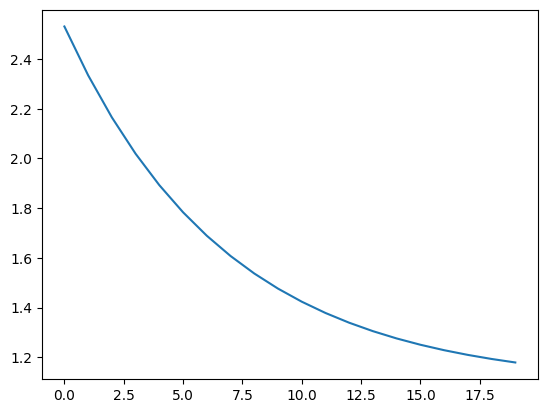

In [136]:
plt.plot(losses)

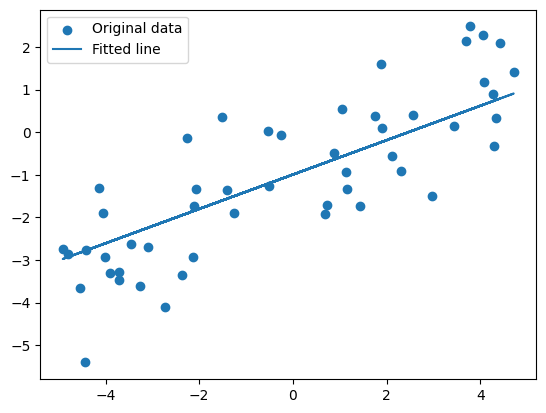

In [137]:
# Plot the graph 
predicted = model(inputs).detach().numpy() # detach
# torch.tensors are designed to be used in the context of gradient descent 
# optimization, and therefore they hold not only a tensor with numeric values, 
# but (and more importantly) the computational graph leading to these values. 
# This computational graph is then used (using the chain rule of derivatives) 
# to compute the derivative of the loss function w.r.t each of the independent 
# variables used to compute the loss.
# As mentioned before, np.ndarray object does not have this extra "computational 
# graph" layer and therefore, when converting a torch.tensor to np.ndarray 
# you must explicitly remove the computational graph of the tensor using the 
# detach() command.

plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [138]:
# Error! Use without detach() funciton
model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [139]:
# Another way 
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-1.1969339 ],
       [-1.0956367 ],
       [-1.5054783 ],
       [-2.977949  ],
       [-1.5628223 ],
       [-2.612886  ],
       [-0.42012316],
       [-2.0958145 ],
       [-2.574135  ],
       [-0.72034496],
       [ 0.78703946],
       [-2.6293654 ],
       [-0.5336743 ],
       [-2.6649084 ],
       [-1.8279941 ],
       [-1.2086369 ],
       [-2.2450917 ],
       [-0.06638736],
       [-2.311715  ],
       [ 0.49385768],
       [ 0.9085104 ],
       [-2.4930263 ],
       [-0.23010296],
       [ 0.72630066],
       [ 0.03838402],
       [-2.7846785 ],
       [-1.8478068 ],
       [-2.7816343 ],
       [ 0.52948314],
       [-2.8254757 ],
       [ 0.64085525],
       [-1.9086838 ],
       [-0.7013643 ],
       [ 0.75542516],
       [-0.28856164],
       [-1.8567193 ],
       [-2.9312358 ],
       [ 0.73833877],
       [-1.6087618 ],
       [-2.3873405 ],
       [-0.2309078 ],
       [-1.949448  ],
       [-0.52456677],
       [ 0.20672053],
       [-0.6377727 ],
       [-0

In [140]:
# Important!
# In order to test the efficiency of our model, synthetic data is useful
# Why?
# Because *** we know the answer ***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.4037862]] [-0.99432963]
